In [4]:
pip install pandas numpy scikit-learn xgboost matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
# Load the dataset (replace 'AirQualityUCI.csv' with the actual file path)
data = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

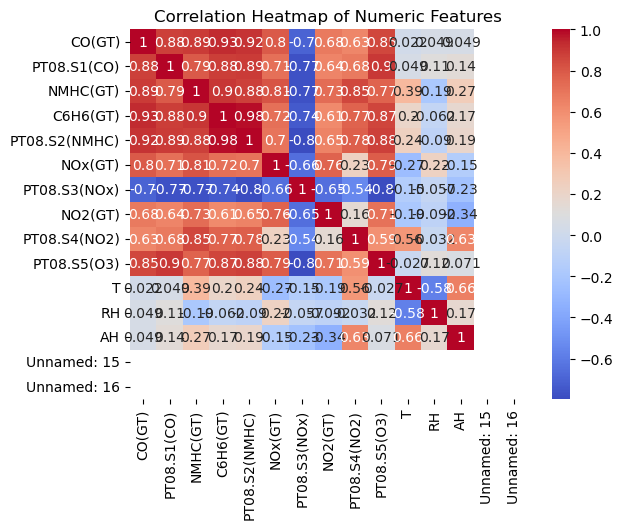

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (adjust the path as needed)
data = pd.read_csv(r'AirQualityUCI.csv', sep=';', decimal=',')

# Replace -200 with NaN (as per dataset convention for missing values)
data.replace(-200, float('nan'), inplace=True)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix and plot heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [9]:
data.replace(-200, float('nan'), inplace=True)


In [15]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv(r'AirQualityUCI.csv', sep=';', decimal=',')

# Replace -200 with NaN (dataset convention for missing values)
data.replace(-200, float('nan'), inplace=True)

# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numeric columns with their respective means
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [17]:
# Example: Assuming PM2.5 is the target
features = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']
target = 'PT08.S5(O3)'  # Adjust based on your target variable
X = data[features]
y = data[target]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

In [23]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
# Predict on test set
rf_predictions = rf_model.predict(X_test)

In [25]:
from xgboost import XGBRegressor
# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
# Train the model
xgb_model.fit(X_train, y_train)
# Predict on test set
xgb_predictions = xgb_model.predict(X_test)

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}\n")
# Evaluate Random Forest
evaluate_model(y_test, rf_predictions, "Random Forest")
# Evaluate XGBoost
evaluate_model(y_test, xgb_predictions, "XGBoost")

Random Forest Performance:
RMSE: 207.8584
MAE: 163.5828
R²: 0.7559

XGBoost Performance:
RMSE: 217.7364
MAE: 168.2494
R²: 0.7321



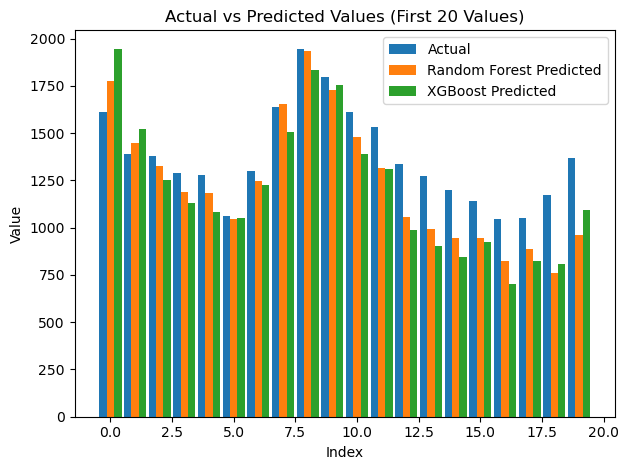

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Slice the first 20 values
indices = np.arange(20)

y_test_sampled = y_test.values[:20]
rf_sampled = rf_predictions[:20]
xgb_sampled = xgb_predictions[:20]

x = np.arange(len(indices))  # new x positions for the first 20 values
width = 0.3  # width of each bar

plt.bar(x - width, y_test_sampled, width=width, label='Actual')
plt.bar(x, rf_sampled, width=width, label='Random Forest Predicted')
plt.bar(x + width, xgb_sampled, width=width, label='XGBoost Predicted')

plt.legend()
plt.title('Actual vs Predicted Values (First 20 Values)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


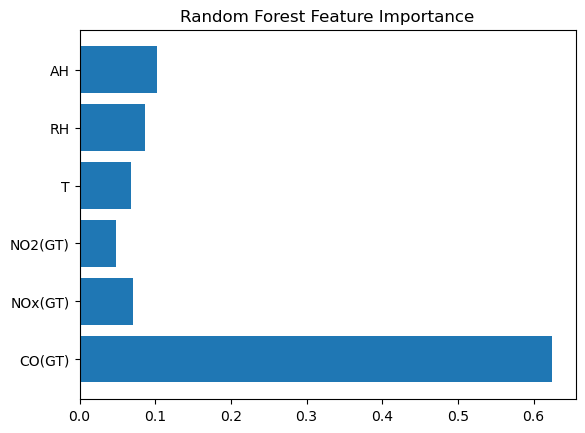

In [47]:
importances = rf_model.feature_importances_
feature_names = features
plt.barh(feature_names, importances)
plt.title('Random Forest Feature Importance')
plt.show()

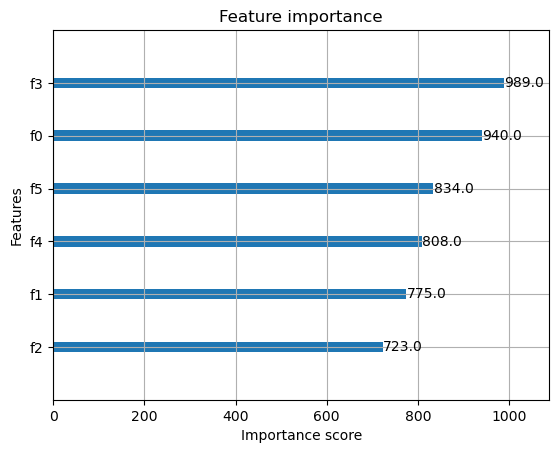

In [49]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

In [51]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']